<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Playground" data-toc-modified-id="Playground-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Playground</a></span><ul class="toc-item"><li><span><a href="#Initial-stuff" data-toc-modified-id="Initial-stuff-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial stuff</a></span></li><li><span><a href="#Analysis-on-texture-features" data-toc-modified-id="Analysis-on-texture-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysis on texture features</a></span></li><li><span><a href="#Attempt-to-find-brightness" data-toc-modified-id="Attempt-to-find-brightness-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Attempt to find brightness</a></span></li><li><span><a href="#Attempt-to-find-contrast" data-toc-modified-id="Attempt-to-find-contrast-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Attempt to find contrast</a></span></li></ul></li><li><span><a href="#CHECK-FROM-HERE" data-toc-modified-id="CHECK-FROM-HERE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CHECK FROM HERE</a></span><ul class="toc-item"><li><span><a href="#Redoing-the-above-tables" data-toc-modified-id="Redoing-the-above-tables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Redoing the above tables</a></span></li><li><span><a href="#Table-with-brightness-and-contrast" data-toc-modified-id="Table-with-brightness-and-contrast-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Table with brightness and contrast</a></span></li><li><span><a href="#Corr-coeff" data-toc-modified-id="Corr-coeff-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Corr coeff</a></span></li><li><span><a href="#Covariance" data-toc-modified-id="Covariance-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Covariance</a></span></li><li><span><a href="#Comparing-intensities-of-NWM-and-others" data-toc-modified-id="Comparing-intensities-of-NWM-and-others-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparing intensities of NWM and others</a></span><ul class="toc-item"><li><span><a href="#Brightness-of-mask" data-toc-modified-id="Brightness-of-mask-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Brightness of mask</a></span></li><li><span><a href="#Contrast-of-mask" data-toc-modified-id="Contrast-of-mask-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Contrast of mask</a></span></li></ul></li></ul></li></ul></div>

# Playground

## Initial stuff

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from scipy.io import loadmat

In [2]:
patients_df = pd.read_excel(
    "data/Initial & repeat MRI in MS-Free Dataset/PatientCodes-Names.xls")

In [3]:
patients_df.drop(0, inplace=True)

patients_df.drop(columns=["Unnamed: 7", "Unnamed: 6"], inplace=True)

In [4]:
patients_df.head()

,N,Date Of bitrh,Date of Exam,Age at onset,Unnamed: 4,CODE
1,1.0,1970-01-05,2004-05-24,34.0,NaN,AT
2,2.0,1973-10-20,2003-11-12,30.0,NaN,AA
3,3.0,1953-05-15,2003-01-14,50.0,NaN,GPE
4,4.0,1981-03-29,2004-02-11,23.0,NaN,HC
5,5.0,1983-07-21,2004-07-21,21.0,NaN,IO


In [5]:
patients_df.columns

Index(['N', 'Date Of bitrh ', 'Date of Exam ', 'Age at onset ', 'Unnamed: 4',
       'CODE'],
      dtype='object')

Text(0, 0.5, 'Number of patients')

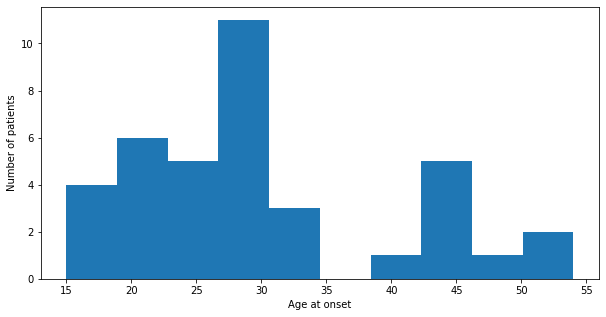

In [6]:
plt.figure(figsize=(10, 5))
patients_df["Age at onset "].plot(kind="hist")
plt.xlabel("Age at onset")
plt.ylabel("Number of patients")

In [29]:
patients_df["Date of Exam "] = pd.to_datetime(patients_df["Date of Exam "])

im = Image.open(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img013.bmp")
lesion_scan = np.array(im)

lesion_data = loadmat(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img018_1.plq")

In [30]:
lesion_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Aug 19 18:05:35 2009',
 '__version__': '1.0',
 '__globals__': [],
 'file_ver': array([[2]], dtype=uint8),
 'mask': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

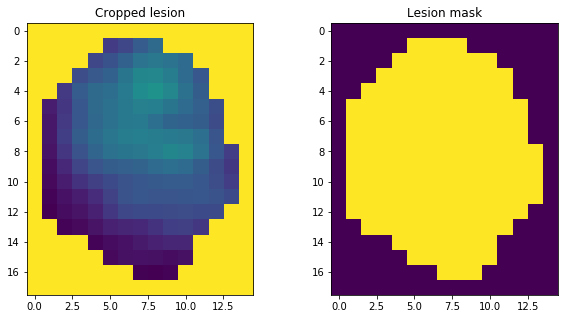

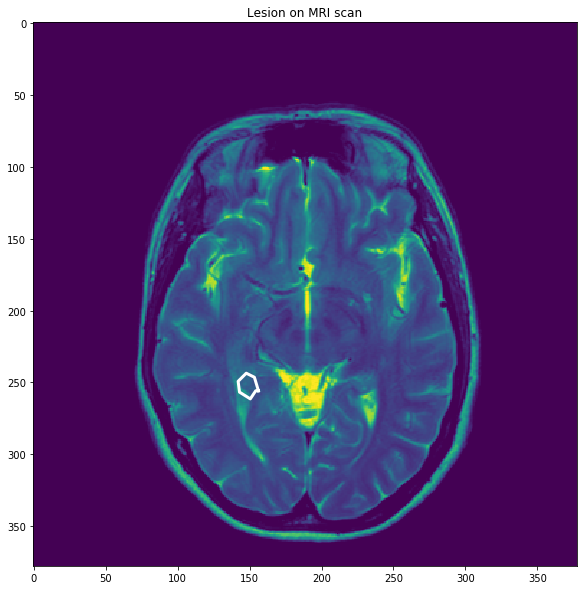

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lesion_data["reg"])
plt.title("Cropped lesion")
plt.subplot(122)
plt.imshow(lesion_data["mask"])
plt.title("Lesion mask")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(lesion_scan)
plt.plot(lesion_data["xi"], lesion_data["yi"], color="white", linewidth=3)
plt.title("Lesion on MRI scan")
plt.show()

In [17]:
def process_plq(path):
    params = loadmat(path)
    return params["mask"].sum(), (params["reg"] * params["mask"]).mean() / 255

In [18]:
shapes = []
for root, dirs, files in os.walk(
        "data/Initial & repeat MRI in MS-Free Dataset/"):
    path = root.split(os.sep)
    for file in files:
        if ".plq" in file:
            _, _, patient, stage = root.split("/")
            path = root + "/" + file
            size, intensity = process_plq(path)
            shapes.append((size, intensity, patient, stage))

In [19]:
shapes_df = pd.DataFrame(shapes,
                         columns=["size", "intensity", "patient", "stage"])

In [20]:
patient_progress_df = shapes_df.groupby(["stage",
                                         "patient"])[["intensity",
                                                      "size"]].agg({
                                                          "intensity":
                                                          "mean",
                                                          "size":
                                                          ["count", "mean"]
                                                      }).reset_index()

patient_progress_df.columns = [
    "stage", "patient", "number", "size", "intensity"
]

patient_progress_df = patient_progress_df[patient_progress_df["stage"] == "1"][
    ["patient", "number", "intensity",
     "size"]].merge(patient_progress_df[patient_progress_df["stage"] == "2"][[
         "patient", "number", "intensity", "size"
     ]],
                    how="left",
                    on="patient",
                    suffixes=("_initial", "_repeated"))

patient_progress_df["size_change"] = patient_progress_df[
    "size_repeated"] / patient_progress_df["size_initial"]
patient_progress_df["intensity_change"] = patient_progress_df[
    "intensity_repeated"] / patient_progress_df["intensity_initial"]
patient_progress_df["number_change"] = patient_progress_df[
    "number_repeated"] / patient_progress_df["number_initial"]

In [21]:
patient_progress_df.sort_values("intensity_change", ascending=False).head()

,patient,number_initial,intensity_initial,size_initial,number_repeated,intensity_repeated,size_repeated,size_change,intensity_change,number_change
37,TZN,0.215658,132.250000,4,0.266447,333.285714,28,7.000000,2.520119,1.235508
35,TSA,0.175778,54.333333,24,0.173991,93.763158,38,1.583333,1.725702,0.989835
10,GPE,0.236244,130.928571,42,0.210275,199.779661,59,1.404762,1.525868,0.890078
22,MK,0.389462,220.875000,8,0.335483,334.384615,13,1.625000,1.513909,0.861402
28,PRI,0.205052,139.754098,61,0.192825,188.983333,60,0.983607,1.352256,0.940372


In [22]:
patient_progress_df.drop(37, inplace=True)

In [23]:
patient_progress_df = patient_progress_df.merge(patients_df,
                                                left_on="patient",
                                                right_on="CODE")

Text(0, 0.5, 'Mean intensity change')

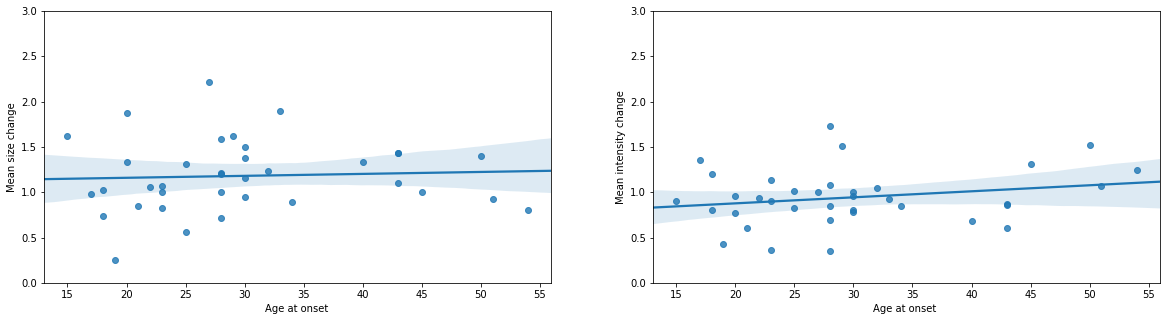

In [24]:
plt.figure(figsize=(20, 5))
# plt.title("Dependency between age and a course of a disease")
plt.subplot(121)
sns.regplot(patient_progress_df["Age at onset "],
            patient_progress_df["size_change"])
plt.ylim(0, 3)
plt.ylabel("Mean size change")

plt.subplot(122)
sns.regplot(patient_progress_df["Age at onset "],
            patient_progress_df["intensity_change"])
plt.ylim(0, 3)
plt.ylabel("Mean intensity change")

In [25]:
patient_progress_df.head(10)

,patient,number_initial,intensity_initial,size_initial,number_repeated,intensity_repeated,size_repeated,size_change,intensity_change,number_change,N,Date Of bitrh,Date of Exam,Age at onset,Unnamed: 4,CODE
0,AA,0.308227,185.026316,38,0.308126,186.000000,36,0.947368,1.005262,0.999671,2.0,1973-10-20,2003-11-12,30.0,NaN,AA
1,ARK,0.218597,38.142857,7,0.190021,33.000000,10,1.428571,0.865169,0.869278,23.0,1962-10-02,2005-06-23,43.0,NaN,ARK
2,AT,0.289054,95.111111,9,0.197010,80.625000,8,0.888889,0.847693,0.681566,1.0,1970-01-05,2004-05-24,34.0,NaN,AT
3,CHP,0.157853,30.368421,19,0.212683,29.181818,22,1.157895,0.960926,1.347349,24.0,1977-12-11,2007-10-01,30.0,NaN,CHP
4,CK,0.124341,132.807692,26,0.235026,106.256410,39,1.500000,0.800077,1.890171,37.0,1978-05-30,2008-02-11,30.0,NaN,CK
5,CP,0.268101,155.200000,15,0.243180,192.750000,12,0.800000,1.241946,0.907048,17.0,1952-09-17,2006-01-07,54.0,NaN,CP
6,DK,0.052495,266.000000,5,0.209251,94.166667,6,1.200000,0.354010,3.986145,26.0,1979-02-12,2007-07-12,28.0,NaN,DK
7,FA,0.169890,51.666667,27,0.177104,41.650000,20,0.740741,0.806129,1.042462,27.0,1990-02-08,2008-05-01,18.0,NaN,FA
8,FI,0.199504,130.962264,53,0.241788,140.830189,53,1.000000,1.075349,1.211946,28.0,1978-12-14,2006-07-13,28.0,NaN,FI
9,GPE,0.236244,130.928571,42,0.210275,199.779661,59,1.404762,1.525868,0.890078,3.0,1953-05-15,2003-01-14,50.0,NaN,GPE


## Analysis on texture features
- Median Value - intuitively shows the brightness of each ROI. MS Lesions are brighter than NWM.
- Contrast - which is a measure of local variation between pixel intensities. MS regions have higher contrast values than NWM regions

## Attempt to find brightness 

In [36]:
im = Image.open(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img013.bmp")
lesion_scan = np.array(im)

lesion_data = loadmat(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img018_1.plq")

In [39]:
lesion_data['reg']

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 104, 111, 125, 135, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 111, 118, 129, 142, 145, 142, 136, 255, 255,
        255, 255],
       [255, 255, 255, 115, 123, 129, 143, 156, 157, 149, 136, 122, 255,
        255, 255],
       [255, 255, 103, 125, 135, 138, 148, 161, 166, 157, 141, 126, 255,
        255, 255],
       [255,  86, 101, 122, 135, 141, 146, 152, 151, 143, 136, 128, 116,
        255, 255],
       [255,  84, 103, 122, 133, 140, 146, 148, 139, 131, 129, 126, 114,
        255, 255],
       [255,  84, 106, 126, 137, 144, 149, 151, 149, 147, 145, 139, 120,
        255, 255],
       [255,  82, 101, 119, 132, 140, 143, 145, 150, 156, 153, 142, 122,
        105, 255],
       [255,  78,  93, 110, 120, 126, 128, 130, 136, 139, 136, 126, 114,
        102, 255],
       [255,  77,  87,  99, 107, 113, 119, 122, 124, 125, 125, 122, 115,
       

In [174]:
Image.fromarray(lesion_data['reg']).convert('L')

In [176]:
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

In [177]:
calculate_brightness(Image.fromarray(lesion_data['reg']))

0.6837239583333335

In [117]:
np.array(Image.fromarray(lesion_data['reg']).convert('LA'))

array([[[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [104, 255],
        [111, 255],
        [125, 255],
        [135, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [111, 255],
        [118, 255],
        [129, 255],
        [142, 255],
        [145, 255],
        [142, 255],
        [136, 255],
        [255, 255],
        [255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255],
        [115, 255],
        [123, 

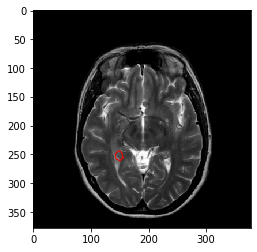

In [119]:
plt.imshow(Image.fromarray(lesion_scan).convert('LA'))
plt.plot(lesion_data["xi"], lesion_data["yi"], color="red", linewidth=1)

In [121]:
np.array(Image.fromarray(lesion_data['reg']).convert('LA')).shape

(18, 15, 2)

In [142]:
datpl = Image.fromarray(lesion_data['reg'])

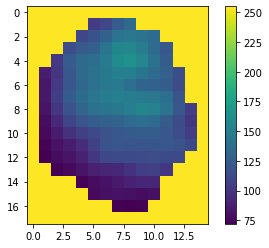

In [148]:
plt.imshow(datpl)
plt.colorbar()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 4., 0.,
        0., 0., 0., 0., 3., 0., 4., 0., 0., 0., 3., 0., 3., 0., 3., 0., 0.,
        0., 2., 0., 1., 0., 1., 0., 2., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
        0., 3., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 2., 0., 3., 0., 2., 0., 1., 0., 2., 0., 2., 0., 2., 0., 1.,
        0., 0., 0., 1., 0., 2., 0., 1., 0., 0., 6., 0., 3., 0., 3., 0., 1.,
        0., 0., 0., 1., 0., 4., 0., 4., 0., 1., 0., 8., 0., 1., 0., 1., 0.,
        4., 0., 5., 0., 0., 0., 2., 0., 3., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 3., 0., 5., 0., 1., 0., 1., 0., 3., 0., 2., 0., 2.,
        0., 3., 0., 3., 0., 1., 0., 3., 0., 2., 0., 1., 0., 2., 0., 3., 0.,
        1., 0., 2., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0.,
        0., 

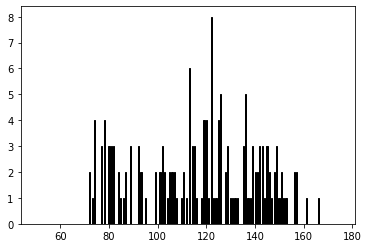

In [149]:
plt.hist(np.array(datpl).ravel(), bins=256, fc='k', ec='k', range=(50, 175))

## Attempt to find contrast

A simple way to calculate contrast is by computing the standard deviation of the greyed image pixel intensities.

In [172]:
np.std(np.array(datpl))

70.81061596493377

In [178]:
def ret_contrast(arr):
    return np.std(np.array(arr))

# CHECK FROM HERE

## Redoing the above tables

In [189]:
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

In [275]:
def ret_contrast(arr):
    arr = Image.fromarray(arr).convert('L')
    return np.std(np.array(arr))

In [179]:
patients_df = pd.read_excel(
    "data/Initial & repeat MRI in MS-Free Dataset/PatientCodes-Names.xls")

In [180]:
patients_df.drop(0, inplace=True)

patients_df.drop(columns=["Unnamed: 7", "Unnamed: 6"], inplace=True)

In [181]:
patients_df.head()

,N,Date Of bitrh,Date of Exam,Age at onset,Unnamed: 4,CODE
1,1.0,1970-01-05,2004-05-24,34.0,NaN,AT
2,2.0,1973-10-20,2003-11-12,30.0,NaN,AA
3,3.0,1953-05-15,2003-01-14,50.0,NaN,GPE
4,4.0,1981-03-29,2004-02-11,23.0,NaN,HC
5,5.0,1983-07-21,2004-07-21,21.0,NaN,IO


Text(0, 0.5, 'Number of patients')

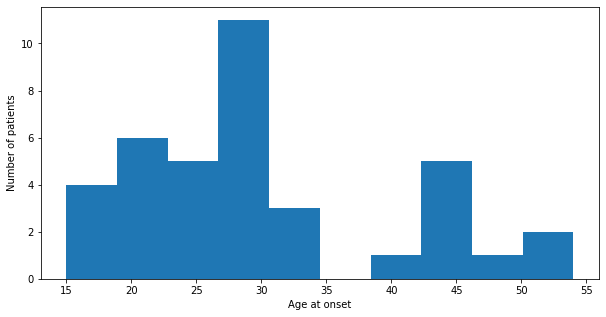

In [182]:
plt.figure(figsize=(10, 5))
patients_df["Age at onset "].plot(kind="hist")
plt.xlabel("Age at onset")
plt.ylabel("Number of patients")

In [183]:
patients_df["Date of Exam "] = pd.to_datetime(patients_df["Date of Exam "])

im = Image.open(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img013.bmp")
lesion_scan = np.array(im)

lesion_data = loadmat(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img018_1.plq")

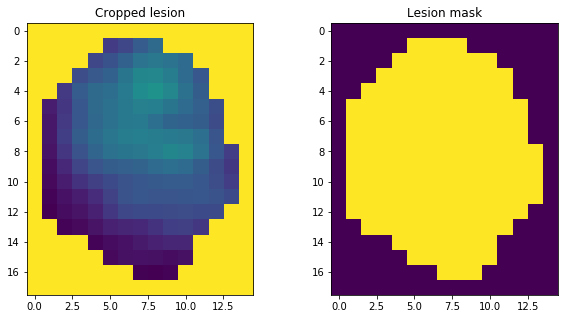

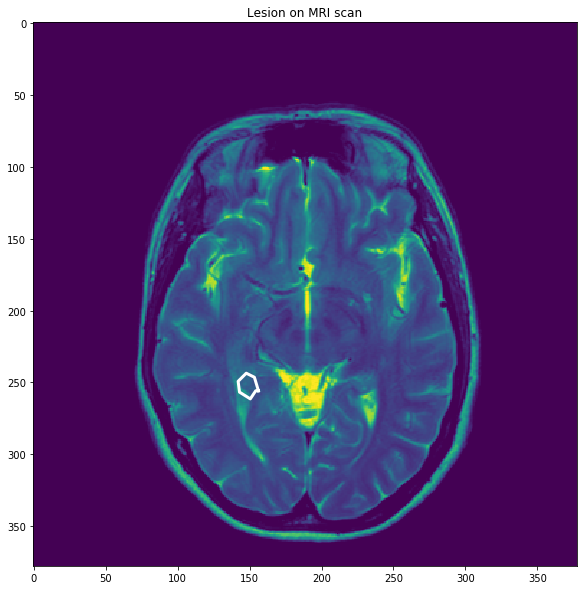

In [184]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lesion_data["reg"])
plt.title("Cropped lesion")
plt.subplot(122)
plt.imshow(lesion_data["mask"])
plt.title("Lesion mask")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(lesion_scan)
plt.plot(lesion_data["xi"], lesion_data["yi"], color="white", linewidth=3)
plt.title("Lesion on MRI scan")
plt.show()

In [192]:
def process_plq(path):
    params = loadmat(path)
    regp = params["reg"]
    return params["mask"].sum(), (params["reg"] * params["mask"]).mean(
    ) / 255, ret_contrast(regp), calculate_brightness(Image.fromarray(regp))

In [276]:
shapes = []
for root, dirs, files in os.walk(
        "data/Initial & repeat MRI in MS-Free Dataset/"):
    path = root.split(os.sep)
    for file in files:
        if ".plq" in file:
            _, _, patient, stage = root.split("/")
            path = root + "/" + file
            size, intensity, bright, contr = process_plq(path)
            shapes.append((size, intensity, bright, contr, patient, stage))

In [277]:
shapes_df = pd.DataFrame(shapes,
                         columns=[
                             'size', 'intensity', 'brightness', 'contrast',
                             'patient', 'stage'
                         ])

In [278]:
shapes_df

,size,intensity,brightness,contrast,patient,stage
0,108,0.281535,64.979828,0.701245,AA,1
1,238,0.350352,52.414451,0.777923,AA,1
2,178,0.227692,71.893581,0.704461,AA,1
3,134,0.209617,77.348491,0.675223,AA,1
4,73,0.294078,67.925527,0.554530,AA,1
...,...,...,...,...,...,...
1772,187,0.235271,73.383028,0.676072,TZN,2
1773,50,0.131858,48.599984,0.890272,TZN,2
1774,205,0.298946,66.472122,0.655750,TZN,2
1775,234,0.266490,71.118118,0.644914,TZN,2


In [279]:
shapes_df = shapes_df[shapes_df['stage']=='2']

In [280]:
shapes_df

,size,intensity,brightness,contrast,patient,stage
38,197,0.336935,61.981417,0.604933,AA,2
39,250,0.288107,58.358252,0.758816,AA,2
40,97,0.327136,62.824172,0.646280,AA,2
41,255,0.286243,58.181695,0.767040,AA,2
42,55,0.236311,68.698744,0.724212,AA,2
...,...,...,...,...,...,...
1772,187,0.235271,73.383028,0.676072,TZN,2
1773,50,0.131858,48.599984,0.890272,TZN,2
1774,205,0.298946,66.472122,0.655750,TZN,2
1775,234,0.266490,71.118118,0.644914,TZN,2


In [223]:
shapes_df['patient'].unique()

array(['AA', 'ARK', 'AT', 'CHEM', 'CHP', 'CK', 'CP', 'DK', 'FA', 'FI',
       'GPE', 'GSOU', 'HC', 'IG', 'IO', 'IPH', 'IY', 'KAZM', 'KCH', 'KKY',
       'KM', 'MJ', 'MK', 'MME', 'NGE', 'NP', 'PGE', 'PM', 'PRI', 'SE',
       'SKS', 'SP', 'SST', 'TA', 'TE', 'TSA', 'TZDE', 'TZN'], dtype=object)

In [224]:
patient_data = pd.read_excel('data/PatientCodes-Names-full.xls')

In [226]:
patient_data.head()

,N,Date Of bitrh,Date of Exam,Age at onset,CODE,EDSS-5(2010)
0,NaN,NaT,NaT,NaN,NaN,NaN
1,1.0,1970-01-05,2004-05-24,34.0,AT,5.0
2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0
3,3.0,1953-05-15,2003-01-14,50.0,GPE,3.0
4,4.0,1981-03-29,2004-02-11,23.0,HC,1.5


In [231]:
full_dat = pd.merge(shapes_df,patient_data,left_on='patient',right_on='CODE')

## Table with brightness and contrast

In [233]:
full_dat.head()

,size,intensity,brightness,contrast,patient,stage,N,Date Of bitrh,Date of Exam,Age at onset,CODE,EDSS-5(2010)
0,197,0.336935,61.981417,0.604933,AA,2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0
1,250,0.288107,58.358252,0.758816,AA,2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0
2,97,0.327136,62.824172,0.646280,AA,2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0
3,255,0.286243,58.181695,0.767040,AA,2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0
4,55,0.236311,68.698744,0.724212,AA,2,2.0,1973-10-20,2003-11-12,30.0,AA,3.0


In [234]:
np.correlate(full_dat['brightness'],full_dat['EDSS-5(2010)'])

array([192082.93087889])

In [239]:
full_dat[['brightness','EDSS-5(2010)']]

,brightness,EDSS-5(2010)
0,61.981417,3.0
1,58.358252,3.0
2,62.824172,3.0
3,58.181695,3.0
4,68.698744,3.0
...,...,...
930,73.383028,3.0
931,48.599984,3.0
932,66.472122,3.0
933,71.118118,3.0


## Corr coeff

In [248]:
full_dat[['brightness','EDSS-5(2010)']].corr()

,brightness,EDSS-5(2010)
brightness,1.000000,0.018669
EDSS-5(2010),0.018669,1.000000


In [249]:
full_dat[['contrast','EDSS-5(2010)']].corr()

,contrast,EDSS-5(2010)
contrast,1.000000,-0.093611
EDSS-5(2010),-0.093611,1.000000


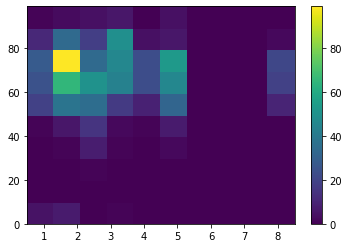

In [256]:
plt.hist2d(full_dat['EDSS-5(2010)'],full_dat['brightness'])
plt.colorbar()

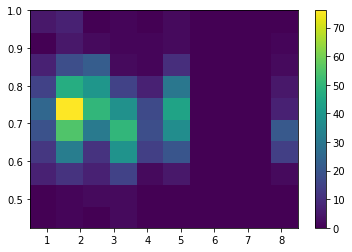

In [271]:
plt.hist2d(full_dat['EDSS-5(2010)'],full_dat['contrast'])
plt.colorbar()

## Covariance

In [270]:
np.cov(full_dat['EDSS-5(2010)'],full_dat['brightness'])

array([[  3.08888685,   0.45159932],
       [  0.45159932, 189.44276218]])

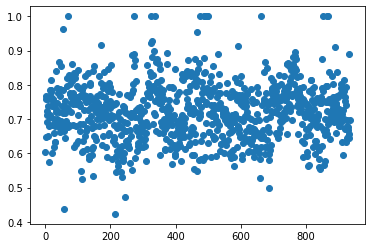

In [265]:
plt.plot(full_dat['contrast'],'o')


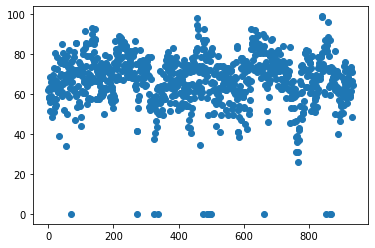

In [264]:
plt.plot(full_dat['brightness'],'o')


In [267]:
full_dat['EDSS-5(2010)'].unique()

array([3. , 2.5, 5. , 2. , 1. , 4.5, 1.5, 8.5, 4. , 0.5])

## Comparing intensities of NWM and others

In [272]:
im = Image.open(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img013.bmp")
lesion_scan = np.array(im)

lesion_data = loadmat(
    "data/Initial & repeat MRI in MS-Free Dataset/CHEM/2/img018_1.plq")

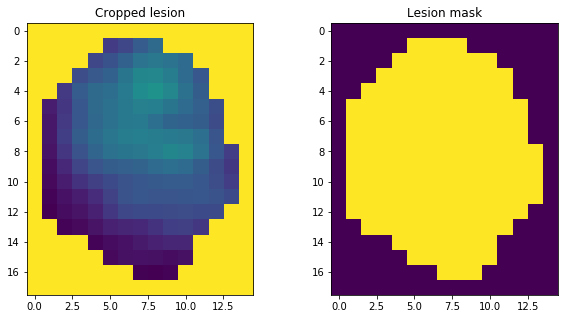

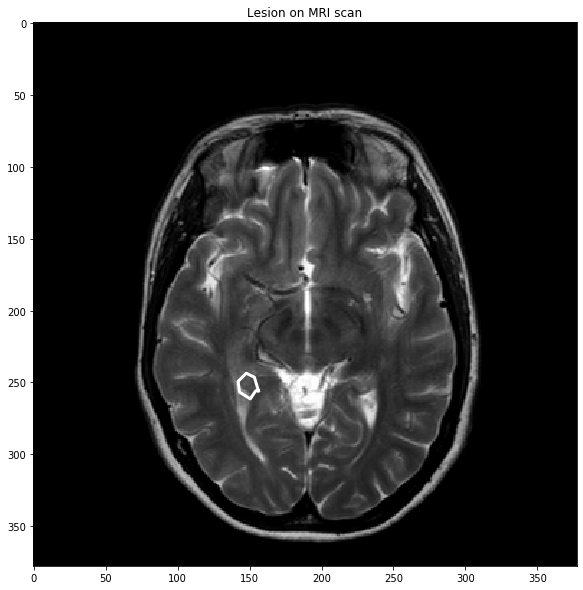

In [285]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lesion_data["reg"])
plt.title("Cropped lesion")
plt.subplot(122)
plt.imshow(lesion_data["mask"])
plt.title("Lesion mask")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(Image.fromarray(lesion_scan).convert('LA'))
plt.plot(lesion_data["xi"], lesion_data["yi"], color="white", linewidth=3)
plt.title("Lesion on MRI scan")
plt.show()

In [300]:
lesion_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Aug 19 18:05:35 2009',
 '__version__': '1.0',
 '__globals__': [],
 'file_ver': array([[2]], dtype=uint8),
 'mask': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

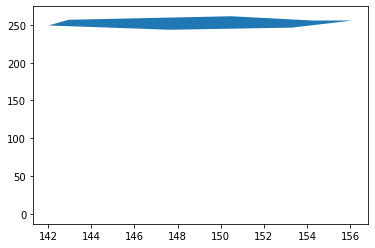

In [303]:
plt.fill_between(lesion_data["xi"].ravel(), lesion_data["yi"].ravel())

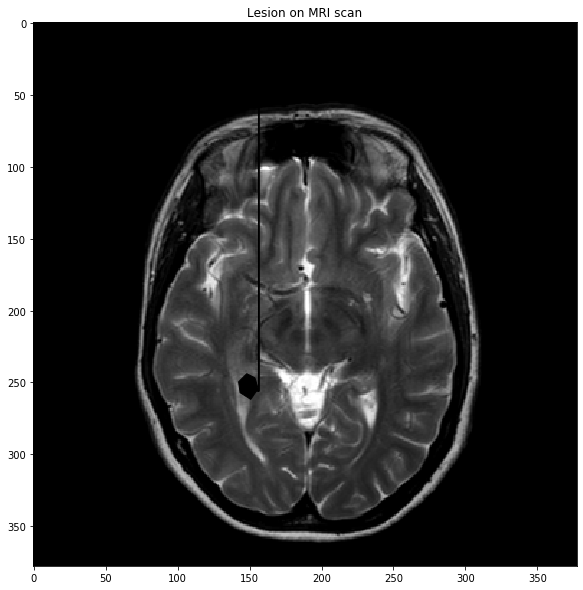

In [311]:
plt.figure(figsize=(10, 10))
plt.imshow(Image.fromarray(lesion_scan).convert('LA'))
#plt.plot(lesion_data["xi"], lesion_data["yi"])
plt.fill_between(lesion_data["xi"].ravel(), lesion_data["yi"].ravel(),color = 'black')
plt.title("Lesion on MRI scan")
plt.savefig('temp.png')
plt.show()

### Brightness of mask

In [313]:
Image.fromarray(lesion_data['reg']).convert('L')

In [309]:
calculate_brightness(Image.fromarray(lesion_data['reg']).convert('L'))

0.6837239583333335

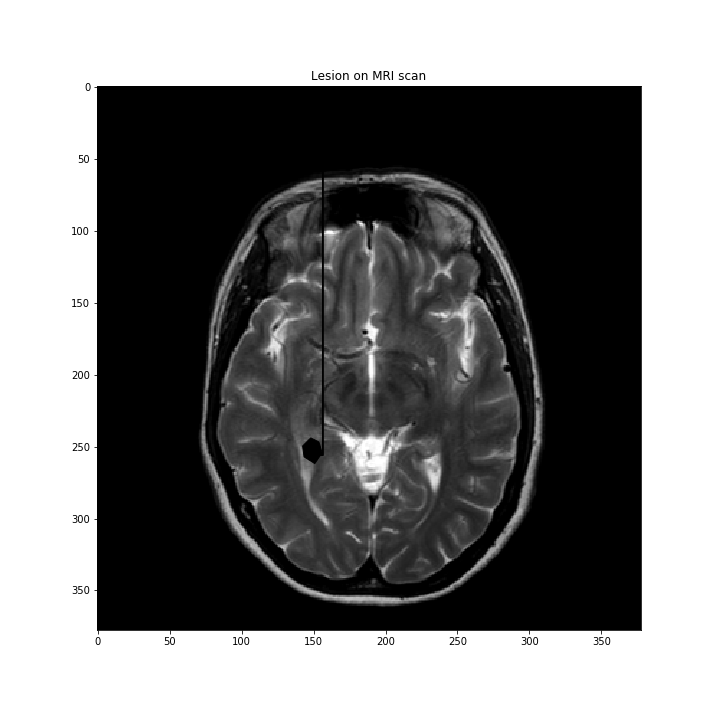

In [314]:
Image.open('temp.png')

In [312]:
calculate_brightness(Image.open('temp.png'))

0.48454498667775864

### Contrast of mask

In [318]:
ret_contrast(np.array(Image.fromarray(lesion_data['reg']).convert('L')))

70.81061596493377

In [319]:
ret_contrast(np.array(Image.open('temp.png')))

117.11768537930475